### A CLASSIFICATION PROJECT - CUSTOMER CHURN ANALYSIS

#### PROJECT SCENARIO
As a data scientist at Vodafone Corporation, a large telecommunication company.
* Vodafone want to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.
* To do this, the business development unit has provided you with data to build a series of machine learning models to predict customer churn.
* The marketing and sales team as well have provided you with some data to aid this endeavor.


#### PROJECT DESCRIPTION
 Telecommunication companies face the ongoing challenge of customer churn, where subscribers discontinue services and switch to competitors. 
 To address this issue and proactively retain customers, we are undertaking a customer churn analysis project utilizing machine learning techniques. 
 In this project, we explore how machine learning techniques can be leveraged for customer churn analysis in telecommunication networks, following the well-established CRISP-DM (Cross-Industry Standard Process for Data Mining) framework. 


#### BUSINESS UNDERSTANDING
In today's highly competitive telecommunication industry, customer churn, or the loss of customers to competitors, poses a significant challenge for companies striving to maintain market share and profitability. 
Identifying customers at risk of churn and implementing proactive retention strategies is crucial for sustaining business growth.

##### HYPOTHESIS
NULL HYPOTHESIS: 

##### ANALYTICAL QUESTIONS

#### DATA UNDERSTANDING

##### Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import pyodbc
from dotenv import load_dotenv
from dotenv import dotenv_values
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

##### Load the datasets

In [42]:
#Loading first dataset from database
# Load environment variables from .env file
environment_variables = dotenv_values('.env')

# Access database credentials from environment variables dictionary
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
password = environment_variables.get("PASSWORD")
username = environment_variables.get("USERNAME")

# Construct the connection string
connection_string = f"DRIVER=ODBC Driver 17 for SQL Server;SERVER={server};DATABASE={database};User Id={username};PASSWORD={password};"

print("USERNAME:", username)

# Construct the connection string
connection_string = f"DRIVER=ODBC Driver 17 for SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};"
# Connect to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful!")
except Exception as e:
    print("Error:", e)

# Specify the SQL queries to extract data from the tables
Dataset1 = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

# Suppress warnings
warnings.filterwarnings('ignore')

# Create a cursor from the connection
with connection.cursor() as cursor:
    # Execute the queries and fetch data into Pandas DataFrames
    Dataset1 = pd.read_sql_query(Dataset1, connection)

USERNAME: LP2_project
Connection successful!


In [43]:
#Preview the first dataset
Dataset1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [44]:
#Load the second the dataset
Dataset2 = pd.read_csv("./Dataset/LP2_Telco-churn-second-2000.csv")
Dataset2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [45]:
#Check the columns
column_names = Dataset1.columns
print(column_names)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [46]:
#Check the columns
column_names = Dataset2.columns
print(column_names)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [47]:
#Check the number of rows and columns
Dataset1.shape

(3000, 21)

In [48]:
#Check the number of rows and columns
Dataset2.shape

(2043, 21)

##### Observations
1. The outputs show both datasets have the same column names and number of columns so they can be merged easily.
2. However, some of the column names are in upper case so they will be converted to lower case.

In [49]:
#Convert column names to lower case
Dataset1.columns = Dataset1.columns.str.lower()

#Check the columns to confirm
column_names = Dataset1.columns
print(column_names)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [50]:
#Convert column names to lower case
Dataset2.columns = Dataset2.columns.str.lower()

#Check the columns to confirm
column_names = Dataset2.columns
print(column_names)

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [51]:
#Check cell values
Dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   seniorcitizen     3000 non-null   bool   
 3   partner           3000 non-null   bool   
 4   dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   phoneservice      3000 non-null   bool   
 7   multiplelines     2731 non-null   object 
 8   internetservice   3000 non-null   object 
 9   onlinesecurity    2349 non-null   object 
 10  onlinebackup      2349 non-null   object 
 11  deviceprotection  2349 non-null   object 
 12  techsupport       2349 non-null   object 
 13  streamingtv       2349 non-null   object 
 14  streamingmovies   2349 non-null   object 
 15  contract          3000 non-null   object 
 16  paperlessbilling  3000 non-null   bool   


##### This shows there are empty cells in these columns; multiplelines, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, totalcharges and churn. They will be treated accordingly.

In [52]:
#Check cell values
Dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   seniorcitizen     2043 non-null   int64  
 3   partner           2043 non-null   object 
 4   dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   phoneservice      2043 non-null   object 
 7   multiplelines     2043 non-null   object 
 8   internetservice   2043 non-null   object 
 9   onlinesecurity    2043 non-null   object 
 10  onlinebackup      2043 non-null   object 
 11  deviceprotection  2043 non-null   object 
 12  techsupport       2043 non-null   object 
 13  streamingtv       2043 non-null   object 
 14  streamingmovies   2043 non-null   object 
 15  contract          2043 non-null   object 
 16  paperlessbilling  2043 non-null   object 


##### This shows there are no empty cells in any of the columns but some of the columns have the wrong datatype. This will be taken care of accordingly.

In [53]:
#Check for the unique values of each column
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

#Check for Dataset1
check_unique_values(Dataset1)

Unique values in column 'customerid': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '1891-FZYSA' '4770-UEZOX'
 '1A1:U3001038-RQOST']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'seniorcitizen': [False  True]
Unique values in column 'partner': [ True False]
Unique values in column 'dependents': [False  True]
Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'phoneservice': [False  True]
Unique values in column 'multiplelines': [None False True]
Unique values in column 'internetservice': ['DSL' 'Fiber optic' 'No']
Unique values in column 'onlinesecurity': [False True None]
Unique values in column 'onlinebackup': [True False None]
Unique values in column 'deviceprotection': [False True None]
Unique values in column 'techsupport': [

In [54]:
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

#Check for Dataset2
check_unique_values(Dataset2)

Unique values in column 'customerid': ['5600-PDUJF' '8292-TYSPY' '0567-XRHCU' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in column 'gender': ['Male' 'Female']
Unique values in column 'seniorcitizen': [0 1]
Unique values in column 'partner': ['No' 'Yes']
Unique values in column 'dependents': ['No' 'Yes']
Unique values in column 'tenure': [ 6 19 69 11 64 39 15 25 66 61 43 12 23 71 34  5 41 72 14  1 10  7  9 48
 20 16  2 22 35 54 56 18 68 53 30 36 55 21 33 44  4 49 42 67 40 45 57  8
 65  3 17 28 52 47 50 46 29 27 13 24 62 26 60 51 70 59 38 37  0 58 31 32
 63]
Unique values in column 'phoneservice': ['Yes' 'No']
Unique values in column 'multiplelines': ['No' 'No phone service' 'Yes']
Unique values in column 'internetservice': ['DSL' 'Fiber optic' 'No']
Unique values in column 'onlinesecurity': ['No' 'Yes' 'No internet service']
Unique values in column 'onlinebackup': ['No' 'Yes' 'No internet service']
Unique values in column 'deviceprotection': ['No' 'Yes' 'No internet serv

##### The 'True' and 'False' values in the first dataset will be replaced with 'Yes' and 'No' to ensure both datasets have the same values before they are merged.

In [55]:
#Replace the "True" and "False" values in Dataset1
def replace_true_false(df):
    df.replace({True: 'Yes', False: 'No'}, inplace=True)

replace_true_false(Dataset1)

In [56]:
#Check Dataset1 to confirm
Dataset1.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,No,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [57]:
#Replace the values in seniorcitizen column
def replace_yes_no_with_1_0(df):
    df['seniorcitizen'] = df['seniorcitizen'].replace({'Yes': 1, 'No': 0})

replace_yes_no_with_1_0(Dataset1)

In [58]:
#Check Dataset1 to confirm
Dataset1.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


##### Since the columns and values for both datasets are similar now, we will merge both datasets.

In [59]:
#Merge both datasets
df = pd.concat([Dataset1, Dataset2], axis=0)

In [60]:
#Check merged dataframe
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [61]:
#Check rows and columns
df.shape

(5043, 21)

In [62]:
#Check cell values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 
 17  

##### The 'totalcharges' column has the wrong datatype. It will be converted into a float. 

In [63]:
#Convert 'totalcharges' column to numeric (float)
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [64]:
#Check cell values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   seniorcitizen     5043 non-null   int64  
 3   partner           5043 non-null   object 
 4   dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   phoneservice      5043 non-null   object 
 7   multiplelines     4774 non-null   object 
 8   internetservice   5043 non-null   object 
 9   onlinesecurity    4392 non-null   object 
 10  onlinebackup      4392 non-null   object 
 11  deviceprotection  4392 non-null   object 
 12  techsupport       4392 non-null   object 
 13  streamingtv       4392 non-null   object 
 14  streamingmovies   4392 non-null   object 
 15  contract          5043 non-null   object 
 16  paperlessbilling  5043 non-null   object 
 17  

In [65]:
#Check for duplicates
df.duplicated().sum()

0

In [66]:
#Check missing values
df.isna().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          8
churn                 1
dtype: int64

##### Check the columns

In [68]:
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

#Check for Dataset2
check_unique_values(df)

Unique values in column 'customerid': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in column 'gender': ['Female' 'Male']
Unique values in column 'seniorcitizen': [0 1]
Unique values in column 'partner': ['Yes' 'No']
Unique values in column 'dependents': ['No' 'Yes']
Unique values in column 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in column 'phoneservice': ['No' 'Yes']
Unique values in column 'multiplelines': [None 'No' 'Yes' 'No phone service']
Unique values in column 'internetservice': ['DSL' 'Fiber optic' 'No']
Unique values in column 'onlinesecurity': ['No' 'Yes' None 'No internet service']
Unique values in column 'onlinebackup': ['Yes' 'No' None 'No internet service']
Unique values in column 'deviceprotection': ['No' 'Yes' No

##### Univariate Analysis

##### Distribution of Categorical Variables

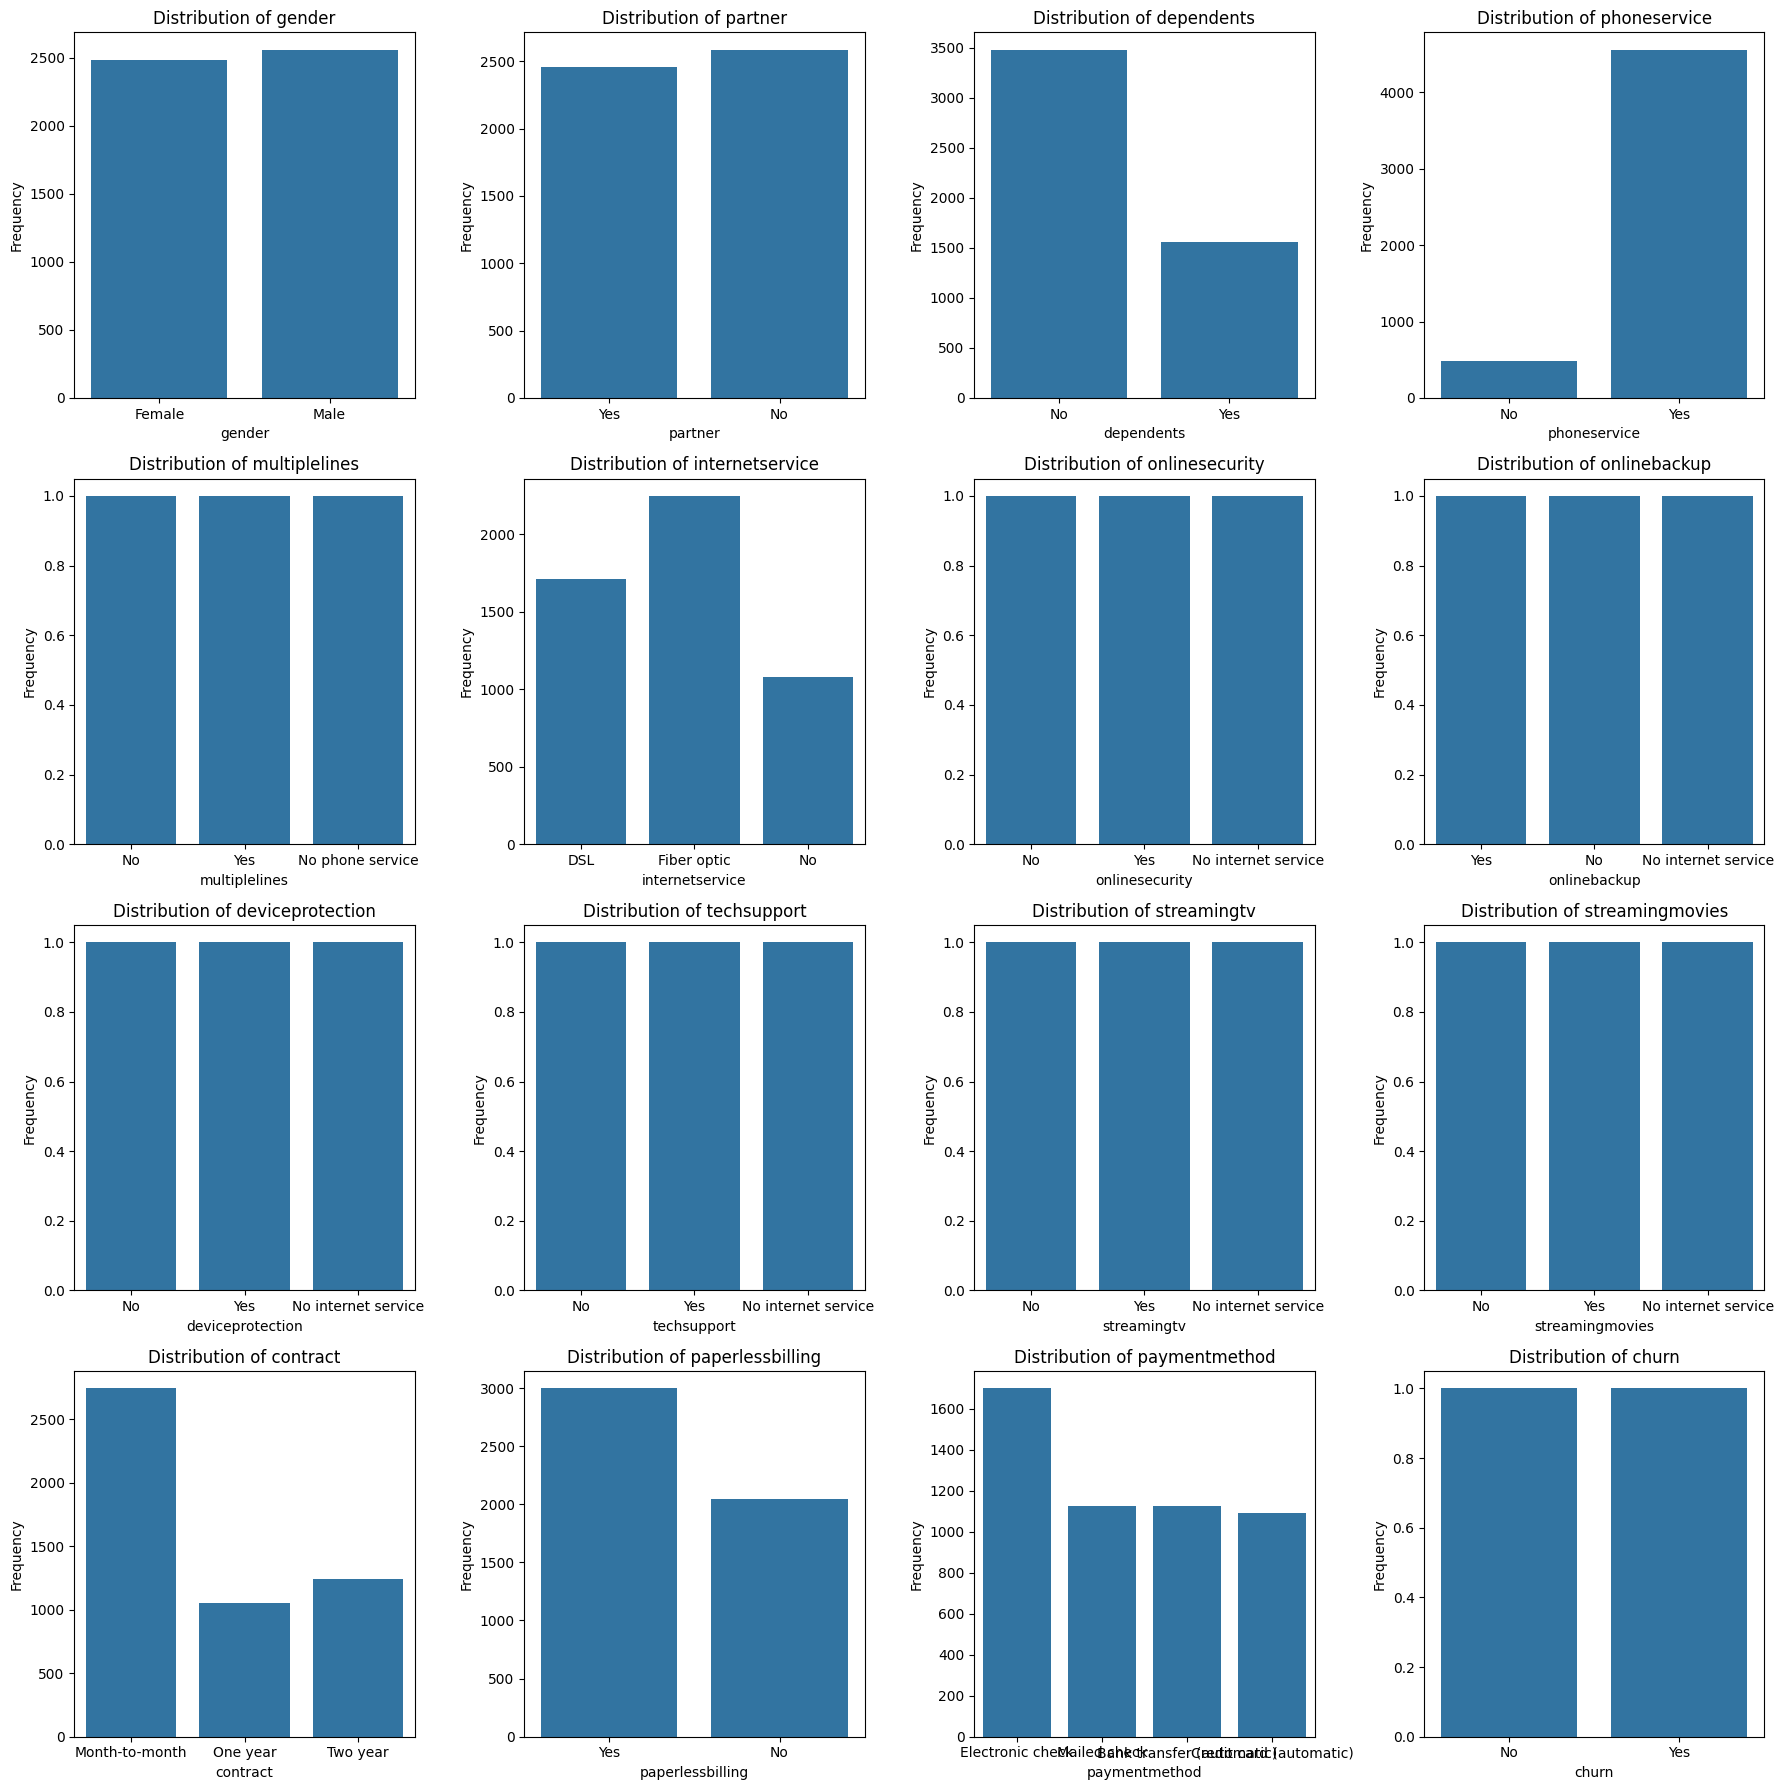

In [70]:

# List of categorical columns
categorical_columns = ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 
                       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 
                       'techsupport', 'streamingtv', 'streamingmovies', 'contract', 
                       'paperlessbilling', 'paymentmethod', 'churn']

# Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 18))
axes = axes.flatten()

# Loop through each categorical column and plot the frequency of each category
for i, column in enumerate(categorical_columns):
    # Check for duplicate labels and drop them
    unique_values = df[column].unique()
    if len(unique_values) != df[column].nunique():
        df_unique = df.drop_duplicates(subset=column)
        sns.countplot(x=column, data=df_unique, ax=axes[i])
    else:
        sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [33]:
#Check summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
monthlycharges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
totalcharges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,None,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,None,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.650002,820.500000,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.099998,1949.400024,No
7,6713-OKOMC,Female,0,No,No,10,No,None,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.750000,301.899994,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.800003,3046.050049,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.150002,3487.949951,No
